## Modulo designado para la creación de el modelo
En este punto los datasets ya se encuentran en archivos .csv dentro de la carpeta
"CSV ready to model"


In [21]:
import pandas as pd
# dfPCA=pd.read_csv('../CSV ready to model/withPCA.csv')
df=pd.read_csv('../../CSV ready to model/withoutPCA.csv')
print(df.head(3))

   DIA_NOMBRE     CLASE  DIRECCION  TIPO_GEOCOD    BARRIO    COMUNA    DISENO  \
0   -1.666080 -0.003167  -1.466521    -0.037463  1.301911  0.183408 -1.075908   
1    0.411971 -0.003167   1.182333    -0.037463  0.859373 -0.583178 -1.382949   
2   -1.666080 -0.003167  -1.075878    -0.037463 -1.106020  0.730969  0.766341   

        MES       DIA  PERIODO    GRAVEDAD  
0  0.237724 -1.560647     2017      HERIDO  
1 -0.376369 -0.646171     2017      HERIDO  
2 -0.376369 -0.989100     2017  SOLO DAÑOS  


Label encoder para la columna a predecir

In [22]:
df['GRAVEDAD'].value_counts()

HERIDO        60201
SOLO DAÑOS    52790
MUERTO          668
Name: GRAVEDAD, dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['GRAVEDAD']=df.loc[:,['GRAVEDAD']].apply(le.fit_transform)

In [4]:
train,test = [x for _, x in df.groupby(df['PERIODO'] > 2018)]
print(train['PERIODO'].unique())
print(test['PERIODO'].unique())

[2017 2018]
[2019]


In [5]:
train=train.drop(['PERIODO'],axis=1)
test=test.drop(['PERIODO'],axis=1)
y_train = train['GRAVEDAD'].values
x_train = (train.drop(['GRAVEDAD'], axis = 1)).values
y_test = test['GRAVEDAD'].values
x_test=(test.drop(['GRAVEDAD'],axis=1)).values

In [6]:
x_train

array([[-1.66607966, -0.00316686, -1.46652103, ..., -1.07590774,
         0.23772377, -1.5606475 ],
       [ 0.41197083, -0.00316686,  1.18233267, ..., -1.38294911,
        -0.3763685 , -0.6461713 ],
       [-1.66607966, -0.00316686, -1.07587751, ...,  0.76634053,
        -0.3763685 , -0.98909988],
       ...,
       [-0.1075418 ,  1.86181933, -0.69856886, ...,  0.76634053,
         1.4659083 ,  1.29709062],
       [-0.1075418 ,  1.86181933,  0.72604053, ...,  0.76634053,
         1.4659083 ,  1.29709062],
       [ 0.41197083,  1.86181933, -1.95375693, ...,  0.76634053,
         1.4659083 ,  1.41140015]])

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import scikitplot as skplt#Esta librería toca instalarla "conda install -c conda-forge scikit-plot"
import numpy as np

def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)


In [40]:
clf = RandomForestClassifier(n_estimators=100,max_features=5,n_jobs=-1,criterion='entropy')
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [41]:
aux=clf.predict(x_test)

In [42]:
print(classification_error(aux,y_test))

0.24400258079652765


In [43]:
score=clf.score(x_test,y_test)

In [45]:
print(score)

0.7559974192034723


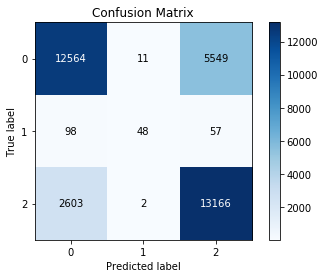

In [46]:
skplt.metrics.plot_confusion_matrix(y_test, aux, normalize=False)

Otra prueba con train test split, o sea que los datos no se dividen por periodos

In [14]:
otherDF=df.drop(['PERIODO'],axis=1)

In [15]:
y=otherDF['GRAVEDAD']
x=otherDF.drop(['GRAVEDAD'],axis=1)


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [28]:
clf = RandomForestClassifier(n_estimators=10,max_features=9,n_jobs=-1)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [29]:
aux=clf.predict(x_test)

In [32]:
print(classification_error(aux,y_test))

0.24705261305648424


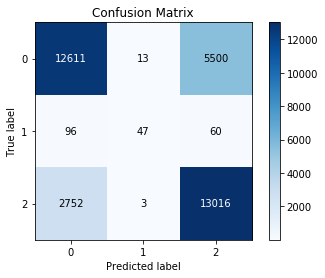

In [33]:
skplt.metrics.plot_confusion_matrix(y_test, aux, normalize=False)

In [ ]:
# Métodos de sobremuestreo oversampling utilizar mediana en lugar y usar min max